<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Classification%20Problems/Multi_class_classification_using_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


## Fashion mnist dataset import

In [33]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels),(test_images, test_labels)=fashion_mnist.load_data()

* The train_images and train_labels arrays are the training set—the data the model uses to learn.

* The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [34]:
# check the shape of data 
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot


In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

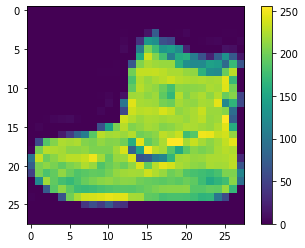

In [36]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [37]:
# max and min values 
train_images.max(), train_images.min()

(255, 0)

In [38]:
train_images_scaled = train_images/255.0
test_images_scaled = test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

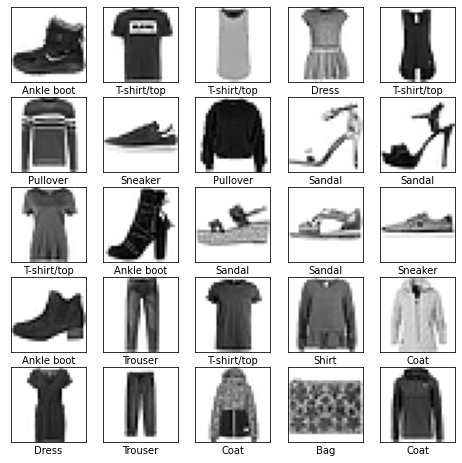

In [39]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images_scaled[i], plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()

## Build a Model
Building the neural network requires configuring the layers of the model, then compiling the model.

**Set up the layers**

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

**Create the model**

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


**Train the model**

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.
Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [40]:
# set the seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


# train the model
history = model.fit(train_images_scaled, train_labels, epochs=10, validation_data=(test_images_scaled, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6229 - accuracy: 0.7847 - val_loss: 0.4188 - val_accuracy: 0.8494
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8636 - val_loss: 0.4545 - val_accuracy: 0.8449
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3434 - accuracy: 0.8739 - val_loss: 0.3803 - val_accuracy: 0.8592
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8882 - val_loss: 0.3769 - val_accuracy: 0.8653
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8879 - val_loss: 0.3665 - val_accuracy: 0.8687
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8951 - val_loss: 0.3771 - val_accuracy: 0.8620
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2624 - accuracy: 0.9008 - val_loss: 0.3596 - val_accuracy:

## Plot the model history

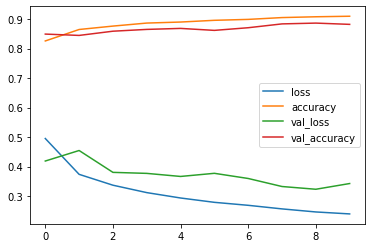

In [41]:
# plot the model history
pd.DataFrame(history.history).plot();

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [42]:
test_loss, test_acc = model.evaluate(test_images_scaled, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8824


In [43]:
print('test accuracy is',test_acc)

test accuracy is 0.8823999762535095


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting.

Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [44]:
prediction = model.predict(test_images_scaled)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction

In [45]:
prediction[0]

array([3.0086966e-07, 2.6052641e-08, 4.6263139e-08, 2.3115161e-11,
       1.5477601e-08, 1.6670194e-02, 7.1805751e-08, 4.0098191e-03,
       7.6408689e-08, 9.7931939e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [46]:
np.argmax(prediction[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [47]:
class_names[9]

'Ankle boot'

In [48]:
test_labels[0]

9

## Plot the prediction

In [49]:
def plot_image(i, prediction_array, true_label, img):
  img, true_label = img[i], true_label[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  predicted_label = np.argmax(prediction_array)
  
  color = 'black'
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.imshow(img, cmap = plt.cm.binary)
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(prediction_array), class_names[true_label]), color=color)


def plot_value_array(i, prediction_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  plt.grid(False)
  thisPlot = plt.bar(range(10), prediction_array, color=['salmon'])
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)
  thisPlot[predicted_label].set_color('red')
  thisPlot[true_label].set_color('blue')



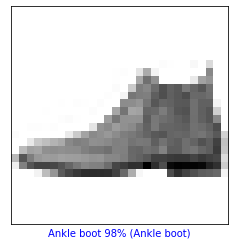

In [50]:
plot_image(0,prediction[0],test_labels, test_images_scaled)

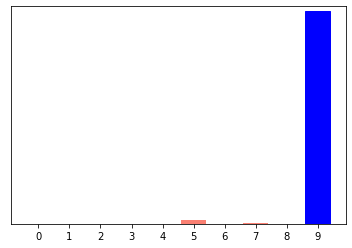

In [51]:
plot_value_array(0, prediction[0], test_labels)

## Verify predictions.

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

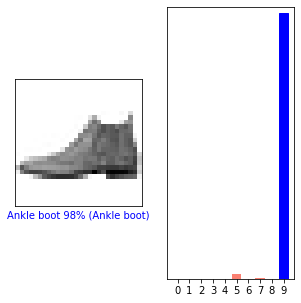

In [52]:
i = 0
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plot_image(i,prediction[i], test_labels, test_images_scaled)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i], test_labels)
plt.show()

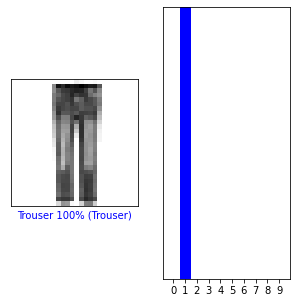

In [53]:
i = 15
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plot_image(i,prediction[i], test_labels, test_images_scaled)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i], test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

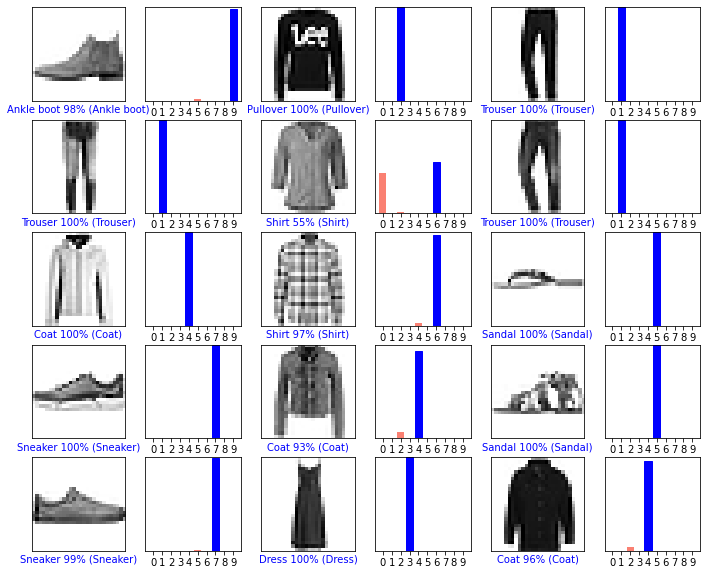

In [54]:
num_row=5
num_col=3
num_img = num_row*num_col
plt.figure(figsize=(12,10))
for i in range(num_img):
  plt.subplot(num_row, 2*num_col, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images_scaled)
  plt.subplot(num_row, 2*num_col, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [55]:
# grab an image from test data

img = test_images_scaled[1]

In [56]:
img.shape

(28, 28)

In [57]:
# Add the image to a batch where it's the only member.

img = tf.expand_dims(img, axis=0)

img.shape

TensorShape([1, 28, 28])

In [58]:
# predict the label for the image
predicted_lable_for_single_image = model.predict(img)
predicted_lable_for_single_image

array([[5.8985880e-04, 2.9513375e-12, 9.9788564e-01, 2.9073124e-11,
        1.2368181e-03, 6.0981038e-12, 2.8763630e-04, 3.4724362e-19,
        2.4741877e-09, 1.5245644e-13]], dtype=float32)

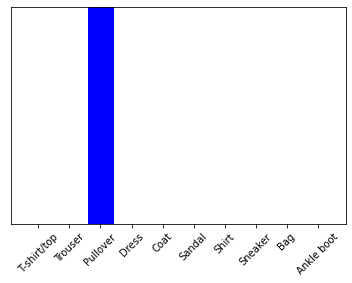

In [59]:
plot_value_array(1,predicted_lable_for_single_image[0],test_labels)
plt.xticks(range(10),class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [60]:
np.argmax(predicted_lable_for_single_image)

2

In [61]:
class_names[np.argmax(predicted_lable_for_single_image)]

'Pullover'

In [62]:
test_labels[1]

2

## Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix

In [69]:
conf_mat = confusion_matrix(test_labels, tf.argmax(prediction, axis=1))
conf_mat

array([[888,   3,  14,  39,   8,   1,  42,   1,   4,   0],
       [  3, 975,   1,  17,   2,   0,   1,   0,   1,   0],
       [ 28,   2, 737,  15, 170,   0,  48,   0,   0,   0],
       [ 25,   3,   7, 922,  31,   0,   9,   0,   3,   0],
       [  2,   1,  48,  34, 889,   0,  25,   0,   1,   0],
       [  0,   0,   0,   1,   0, 972,   0,  19,   0,   8],
       [188,   0,  73,  41, 116,   0, 577,   0,   5,   0],
       [  0,   0,   0,   0,   0,  15,   0, 962,   0,  23],
       [  7,   0,   5,   6,  13,   4,   5,   3, 957,   0],
       [  0,   0,   0,   1,   0,  17,   1,  36,   0, 945]])

In [115]:
# visualize confusion matrix

import itertools

def visualize_confusion_matrix(conf_mat, classes):
  
  conf_mat_norm = conf_mat/conf_mat.sum(axis=1)

  plt.figure(figsize=(15,15))

  # set threshold for text color
  thres = (conf_mat.max()+conf_mat.min())/2.0
  # plot confusion matrix
  plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix', fontsize=25)
  plt.colorbar()
  if classes:
    plt.xticks(range(conf_mat.shape[0]), labels=classes)
    plt.yticks(range(conf_mat.shape[1]), labels=classes)
  else:
    plt.xticks(range(conf_mat.shape[0]), labels=classes)
    plt.yticks(range(conf_mat.shape[1]), labels=classes)
  for i,j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    color='black' if conf_mat[i,j] < thres else 'white'
    plt.text(j,i,'{}({:2.0f}%)'.format(conf_mat[i,j], 100*conf_mat_norm[i,j]), color=color, fontsize=9, ha='center', va='center')

  


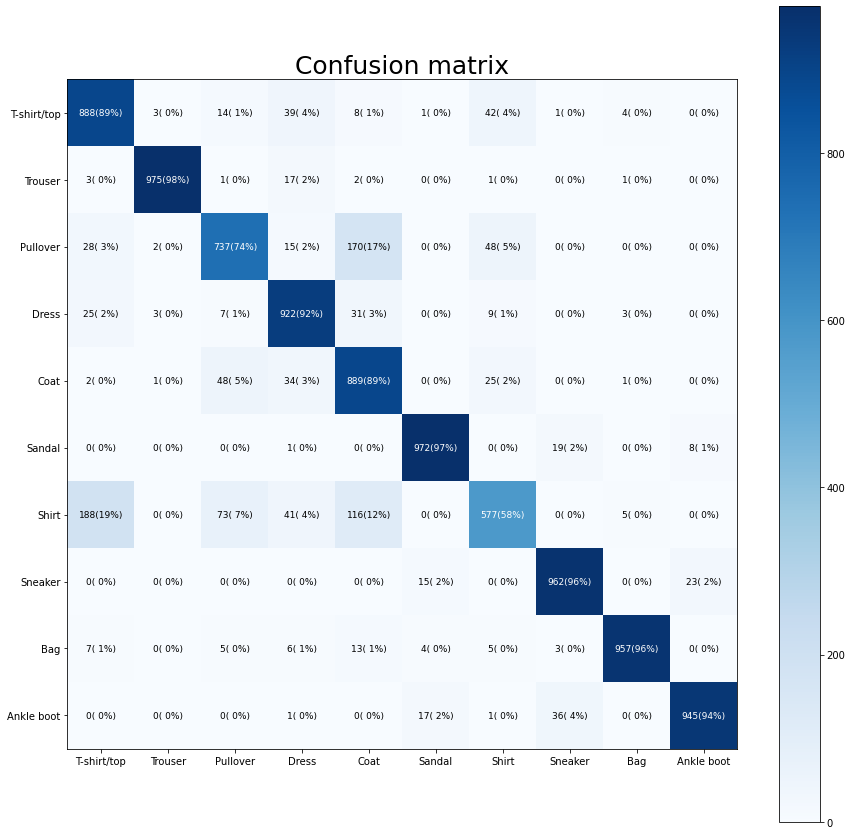

In [116]:
visualize_confusion_matrix(conf_mat, classes=class_names)